
<div style="max-width:66ch;">

# Lecture notes - Pandas basics

This is the lecture note for **Pandas basics** - but it's built upon contents from previous course: 
- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to Pandas. I encourage you to read further about pandas.

Read more 

</div>


<div style="max-width:66ch;">

## Pandas Series

1D array with flexible indices. Series can be seened as a "typed dictionary". The typing makes it more efficient than dictionary in certain computations
- create from dictionary 
- create from list 
- create from array 

</div>

In [39]:
import pandas as pd 
data = dict(INKÖP = 25, OPA = 30 , JS = 30, JAVA = 27) # number of students

series_programs = pd.Series(data=data)
print(series_programs)

# extract values 
print(f"series_programs[0] -> {series_programs.iloc[0]}")
print(f"series_programs[-1] -> {series_programs.iloc[-1]}")

# get the keys
print(f"series_programs.keys() -> {series_programs.keys()}") 
print(f"series_programs.keys()[2] -> {series_programs.keys()[2]}") 

INKÖP    25
OPA      30
JS       30
JAVA     27
dtype: int64
series_programs[0] -> 25
series_programs[-1] -> 27
series_programs.keys() -> Index(['INKÖP', 'OPA', 'JS', 'JAVA'], dtype='object')
series_programs.keys()[2] -> JS


In [40]:
import random as rnd
rnd.seed(42)

# create Series using list
dice_series = pd.Series([rnd.randint(1,6) for _ in range(5)])
print(dice_series)

# some useful methods
print(f"Min value {dice_series.min()}")
print(f"Mean value {dice_series.mean()}")
print(f"Median value {dice_series.median()}")

0    6
1    1
2    1
3    6
4    3
dtype: int64
Min value 1
Mean value 3.4
Median value 3.0


<div style="max-width:66ch;">

## DataFrame
Analog of 2D Numpy array with flexible row indices and col names. Can also be seened as specialized dictionary where each col name is mapped to a Series object. 

- notice that for all operations on DataFrames, we get a return value, which means that you have to assign it to a variable for the changes to persist, unless you specify inplace = True for those methods that providees this parameter.

</div>

In [41]:
df_programs = pd.DataFrame(series_programs,columns=("Num students",))
df_programs

,Num students
INKÖP,25
OPA,30
JS,30
JAVA,27


In [42]:
# create 2 Series objects using dictionary
students = pd.Series(dict(AI = 25, NET = 30 , APP = 30, Java = 27))
language = pd.Series(dict(AI="Python", NET="C#", APP="Kotlin", Java = "Java"))

# create a DataFrame from 2 Series objects using dictionary
df_programs = pd.DataFrame({"Students":students, "Language":language}) # key becomes col name
df_programs

,Students,Language
AI,25,Python
NET,30,C#
APP,30,Kotlin
Java,27,Java


In [43]:
import numpy as np
# can also be created directly
df_programs = pd.DataFrame({
    "Students": np.array((25, 30, 30, 27)),
    "Language": np.array(("Python", "C#", "Kotlin", "Java"))},
    index = ["AI", ".NET", "APP", "Java"])
df_programs

,Students,Language
AI,25,Python
.NET,30,C#
APP,30,Kotlin
Java,27,Java


In [44]:
 # dtype object is used for text or mixed numeric or non-numeric values
df_programs.index

Index(['AI', '.NET', 'APP', 'Java'], dtype='object')

<div style="max-width:66ch;">

## Data selection

  
Can select 
- column(s) with bracket notation (dictionary-style indexing)
- column(s) with attribute-style indexing
    - can give unexpected errors as some methods can share same name as col name   
- row(s) with iloc (integer-based indexing)
- row(s) with loc (label-based indexing)
- boolean indexing
- and some more selecting options, we'll cover those in throughout the course

</div>

In [45]:
# gives a Series object of Students 
df_programs["Students"] # dictionary indexing

AI      25
.NET    30
APP     30
Java    27
Name: Students, dtype: int64

In [46]:
# select multiple columns using list 
df_programs[["Language", "Students"]]

,Language,Students
AI,Python,25
.NET,C#,30
APP,Kotlin,30
Java,Java,27


In [47]:
df_programs.Language # attribute indexing

AI      Python
.NET        C#
APP     Kotlin
Java      Java
Name: Language, dtype: object

In [48]:
df_programs["Language"][".NET"] # selects the Language Series and indexes .NET

'C#'

<div style="max-width:66ch;">

## Indexers

Gives a slicing interface for the indices. loc and iloc are attributes of Series and DataFrame objects.

<table style="display:inline-block; text-align:left;">
  <tr style="background-color: #174A7E; color: white;">
      <th style="text-align:center">Indexer</th>
      <th style="text-align:left">Description</th>
    <tr>
      <td style="text-align:center">loc</td>
      <td style="text-align:left">slicing and indexing referencing explicit index</td>
    </tr>
    <tr>
      <td style="text-align:center">iloc</td>
      <td style="text-align:left">slicing and indexing referencing Python-style index</td>
    </tr>
</table>

</div>


In [49]:
print(df_programs.loc["Java"])

# index multiple rows
df_programs.loc[["Java", "APP"]]

Students      27
Language    Java
Name: Java, dtype: object


,Students,Language
Java,27,Java
APP,30,Kotlin


In [50]:
# slicing with array-style indices
df_programs.iloc[1:3]

,Students,Language
.NET,30,C#
APP,30,Kotlin


<div style="max-width:66ch;">

## Masking
Replaces values where the condition is True

```py
df = df[conditions]
``````

</div>

In [51]:
print(df_programs["Students"] > 25) # this gives a pandas Series of type bool 

df_over_25 = df_programs[df_programs["Students"]>25]
df_over_25

AI      False
.NET     True
APP      True
Java     True
Name: Students, dtype: bool


,Students,Language
.NET,30,C#
APP,30,Kotlin
Java,27,Java


<div style="max-width:66ch;">

## Read csv and clean data
- reads an .csv-file and stores it as DataFrame object

Data comes from: [kaggle amazon sales data](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)

- perform an exploratory data analysis (EDA)
</div>

In [52]:
df = pd.read_csv("../data/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [53]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [54]:
df.shape

(1465, 16)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [56]:
df["rating"]

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460      4
1461    4.1
1462    3.6
1463      4
1464    4.3
Name: rating, Length: 1465, dtype: object

In [57]:
try:
    df.astype({"rating":"float"})
except ValueError as err:
    print(err)

could not convert string to float: '|': Error while type casting for column 'rating'


In [58]:
# tries to convert to numeric and coerce makes values that cannot be converted 
# replaced by NaN
df[pd.to_numeric(df["rating"], errors="coerce").isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


remove the row

In [59]:
# see that one row is removed
df = df[pd.to_numeric(df["rating"], errors="coerce").notna()]
df.shape

(1464, 16)

In [60]:
# check id 1279
df.loc[df["product_id"] == 'B08L12N5H1',:]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [61]:
try: 
    df.astype({"rating": float, "rating_count": int}).info()
except ValueError as e:
    print(e)
# df.info()

invalid literal for int() with base 10: '24,269': Error while type casting for column 'rating_count'


In [62]:
df[pd.to_numeric(df["rating_count"], errors="coerce").isna()]["rating_count"]

# so the comma is for thousands

0       24,269
1       43,994
2        7,928
3       94,363
4       16,905
         ...  
1457     2,518
1460     1,090
1461     4,118
1463     8,031
1464     6,987
Name: rating_count, Length: 1139, dtype: object

replace the thousand comma with nothing so that we can cast it to int

In [63]:
df["rating_count"] = df["rating_count"].str.replace(",", "")
df["rating_count"]

0       24269
1       43994
2        7928
3       94363
4       16905
        ...  
1460     1090
1461     4118
1462      468
1463     8031
1464     6987
Name: rating_count, Length: 1464, dtype: object

In [64]:
try: 
    df.astype({"rating": float, "rating_count": int}).info()
except ValueError as e:
    print(e)

cannot convert float NaN to integer: Error while type casting for column 'rating_count'


In [65]:
df = df[df["rating_count"].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1462 non-null   object
 1   product_name         1462 non-null   object
 2   category             1462 non-null   object
 3   discounted_price     1462 non-null   object
 4   actual_price         1462 non-null   object
 5   discount_percentage  1462 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1462 non-null   object
 9   user_id              1462 non-null   object
 10  user_name            1462 non-null   object
 11  review_id            1462 non-null   object
 12  review_title         1462 non-null   object
 13  review_content       1462 non-null   object
 14  img_link             1462 non-null   object
 15  product_link         1462 non-null   object
dtypes: object(1

In [66]:
df = df.astype({"rating": float, "rating_count": int})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   object 
 4   actual_price         1462 non-null   object 
 5   discount_percentage  1462 non-null   object 
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [67]:
top_10_most_rated = df.sort_values(by = "rating_count", ascending=False)
top_10_most_rated[["product_name", "rating", "rating_count"]].iloc[:10]

,product_name,rating,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426972
400,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713
352,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,4.1,363711
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4.1,313836
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",4.1,313836
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",4.1,313832


In [68]:
top_10_most_rated["review_title"][0].split(",")

['Satisfied',
 'Charging is really fast',
 'Value for money',
 'Product review',
 'Good quality',
 'Good product',
 'Good Product',
 'As of now seems good']

In [69]:
top_10_most_rated["review_title"][1].split(",")

['A Good Braided Cable for Your Type C Device',
 'Good quality product from ambrane',
 'Super cable',
 'As',
 'Good quality',
 'Good product',
 'its good',
 'Good quality for the price but one issue with my unit']

<Axes: xlabel='rating', ylabel='rating_count'>

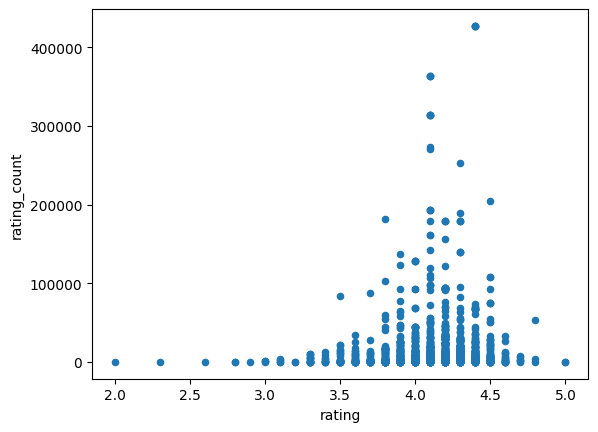

In [70]:
df.plot(x="rating", y="rating_count", kind="scatter")

<div style="max-width:66ch;">

## Summary

In this lecture we've covered the very basics of Pandas as a dataprocessing library, where we've gone through Series och DataFrame objects. Further we've done some simple data cleaning tasks and data visualisation.

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
